In [1]:
import gzip
import json
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_path = "/projects/robustmicrob/jlaw/inputs"

In [3]:
def load_thermomutdb():
    df = pd.DataFrame(json.load(open(f'{dataset_path}/thermomutdb/thermomutdb.json', 'r')))
    df = df.rename(columns={
        'PDB_wild': 'PDB',
        'ddg': 'ddG',
        'dtm': 'dTm',
        'source': 'exp_source',
    })
    # df['wildtype'] = df.mutation_code.str[0]
    # df['mutant'] = df.mutation_code.str[-1]
    # df['pdb_position'] = df.mutation_code.str.strip().str[1:-1]
    # df = df[df.pdb_position.str.isdigit()]
    # df.pdb_position = df.pdb_position.astype(int)
    df['source'] = 'ThermoMutDB'
    df['measure'] = df.measure.str.lower()
    df['method'] = df.method.str.lower()
    df.temperature = df.temperature - 273.15
    df.PDB = df.PDB.str.lower()
    df.loc[df.dropna(subset=['swissprot']).index, 'swissprot'] = df.swissprot.dropna().apply(
        lambda x: x.split('(')[1].replace(')','').replace(' ',''))
    columns = ["id","uniprot","swissprot","protein","mutation_code","mutation_based","ph","temperature","dTm","ddG","measure","method","effect","exp_source","PDB","pdb_mutant","mutated_chain","DOI","source"]

    return df[columns]

df = load_thermomutdb()
df

,id,uniprot,swissprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,method,effect,exp_source,PDB,pdb_mutant,mutated_chain,DOI,source
0,1,P0A878,P0A877,Tryptophan synthase alpha chain,E49M,PDB and Uniprot,7.0,25.8,NaN,4.60,cd,gdnhcl,stabilizing,Escherichia coli (strain K12),1wq5,None,A,10.1093/oxfordjournals.jbchem.a132423,ThermoMutDB
1,2,P0A878,P0A877,Tryptophan synthase alpha chain,E49Q,PDB and Uniprot,7.0,25.8,NaN,-2.50,cd,gdnhcl,destabilizing,Escherichia coli (strain K12),1wq5,None,A,10.1093/oxfordjournals.jbchem.a132423,ThermoMutDB
2,3,P00720,P00720,Endolysin,W138Y,PDB and Uniprot,2.2,25.0,-6.3,-1.71,cd,thermal,destabilizing,Enterobacteria phage T4,2lzm,None,A,10.1016/0005-2795(77)90166-0,ThermoMutDB
3,4,P00720,P00720,Endolysin,"W138Y,W126Y,W158Y",PDB and Uniprot,2.5,25.0,-6.2,-1.77,cd,thermal,destabilizing,Enterobacteria phage T4,2lzm,None,A,10.1016/0005-2795(77)90166-0,ThermoMutDB
4,5,P00720,P00720,Endolysin,"W138Y,W126Y,W158Y",PDB and Uniprot,2.2,25.0,-6.6,-1.82,cd,thermal,destabilizing,Enterobacteria phage T4,2lzm,None,A,10.1016/0005-2795(77)90166-0,ThermoMutDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13332,13333,P03050,P42771,Cyclin-dependent kinase inhibitor 2A,L78G,PDB and Uniprot,8.5,46.0,0.9,NaN,cd,thermal,stabilizing,Homo sapiens,1a5e,None,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13333,13334,P03050,P42771,Cyclin-dependent kinase inhibitor 2A,V95K,PDB and Uniprot,8.5,46.0,1.0,NaN,cd,thermal,stabilizing,Homo sapiens,1a5e,None,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13334,13335,P03050,P42771,Cyclin-dependent kinase inhibitor 2A,W15D,PDB and Uniprot,8.5,46.0,2.2,NaN,cd,thermal,stabilizing,Homo sapiens,1a5e,None,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13335,13336,P03050,P42771,Cyclin-dependent kinase inhibitor 2A,R124D,PDB and Uniprot,8.5,46.0,-0.4,NaN,cd,thermal,destabilizing,Homo sapiens,1a5e,None,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB


In [22]:
df[(df.uniprot == 'P00648') & (df.mutation_code == "D8A")]

,id,uniprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,PDB,pdb_mutant,method,effect,mutated_chain,DOI,source
264,265,P00648,Ribonuclease,D8A,PDB,6.3,298.15,NaN,-0.990000,Fluorescence,1bni,None,Urea,destabilizing,A,10.1016/0022-2836(92)90557-z,ThermoMutDB
286,287,P00648,Ribonuclease,D8A,PDB,6.3,298.15,NaN,-0.951667,Fluorescence,1bni,None,Urea,destabilizing,A,10.1016/0022-2836(92)90562-x,ThermoMutDB
389,390,P00648,Ribonuclease,D8A,PDB,6.3,298.15,-2.00,-0.600000,Fluorescence,1bni,None,Urea,destabilizing,A,10.1016/0022-2836(92)90564-z,ThermoMutDB
1111,1112,P00648,Ribonuclease,D8A,PDB,6.3,298.15,NaN,-0.990000,Fluorescence,1bni,None,Urea,destabilizing,A,10.1016/S0022-2836(99)80018-7,ThermoMutDB
2116,2117,P00648,Ribonuclease,D8A,PDB,4.4,298.15,-1.91,-0.690000,DSC,1bni,None,Thermal,destabilizing,A,10.1093/protein/7.9.1089,ThermoMutDB
3758,3759,P00648,Ribonuclease,D8A,PDB,6.3,298.15,-2.00,-0.600000,CD,1bni,None,Thermal,destabilizing,A,10.1006/jmbi.1997.1546,ThermoMutDB


<AxesSubplot: xlabel='dTm', ylabel='measure'>

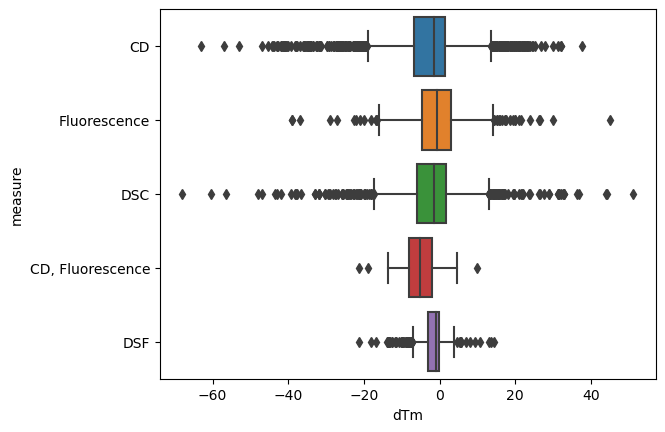

In [26]:
df3 = df[df.measure.isin(['CD', 'Fluorescence', 'CD, Fluorescence', 'DSC', 'DSF'])]
sns.boxplot(data=df3, x='dTm', y='measure')

<AxesSubplot: xlabel='dTm', ylabel='method'>

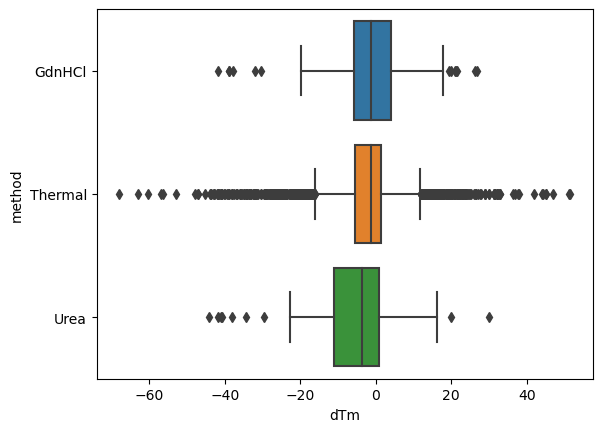

In [31]:
df3 = df[df.method.isin(['Thermal', 'GdnHCl', 'Urea'])]
sns.boxplot(data=df3, x='dTm', y='method')

In [35]:
df[df.method == 'thermal'].tail(2)

,id,uniprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,PDB,pdb_mutant,method,effect,mutated_chain,DOI,source
13335,13336,P03050,Cyclin-dependent kinase inhibitor 2A,R124D,PDB and Uniprot,8.5,319.15,-0.4,NaN,cd,1a5e,None,thermal,destabilizing,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13336,13337,P03050,Cyclin-dependent kinase inhibitor 2A,R128E,PDB and Uniprot,8.5,319.15,1.6,NaN,cd,1a5e,None,thermal,stabilizing,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB


In [33]:
df.method.value_counts()

thermal             6107
gdnhcl              4219
urea                2710
guhci                 73
unavailable           50
activity              29
sds                   24
thermal, urea         24
thermoflur assay      19
gssg, gsh             17
gdmcl                 14
gnhcl                  8
gdnscn                 7
heat treatment         6
gndhcl                 5
urea,thermal           4
pressure               4
gdn-hcl                3
nmr                    3
acid                   2
gdnhcl, urea           2
gdncl.                 2
naclo4 titration       2
guhcl                  1
tfe                    1
gdncl                  1
Name: method, dtype: int64

In [23]:
df.measure.value_counts()

CD                                    5172
Fluorescence                          4590
DSC                                   1472
DSF                                    525
CD, Fluorescence                       387
fluorescence                           198
Abs                                    189
Activity                               153
NMR                                     87
in-gel fluorescence assay               53
PTS, Fluorescence                       51
CD,Fluorescence                         37
Stopped-flow fluorescence               35
DSC, Fluorescence                       34
Fluorescence, CD                        32
Gel electrophoresis                     28
Enzyme Activity                         24
CD, DSF                                 22
Isothermal denaturation                 20
RT-PCR                                  19
CD, ITC                                 17
HPLC                                    17
ITC                                     15
DSF, ITC   

In [4]:
df2 = df[['uniprot', 'mutation_code', 'ph', 'temperature', 'measure']]
df2[df2.duplicated()]

,uniprot,mutation_code,ph,temperature,measure
286,P00648,D8A,6.3,25.0,fluorescence
289,P00648,D12A,6.3,25.0,fluorescence
301,P00648,K27G,6.3,25.0,fluorescence
302,P00648,E29G,6.3,25.0,fluorescence
303,P00648,Q31S,6.3,25.0,fluorescence
...,...,...,...,...,...
13316,P03050,Y38A,7.5,25.0,cd
13319,P03050,V25A,7.5,25.0,cd
13320,P03050,V18A,7.5,25.0,cd
13321,P03050,V33A,7.5,25.0,cd


In [7]:
len(df2.drop_duplicates())

12816

In [5]:
df2.uniprot.value_counts()

P00644    1452
P06654    1153
P00720     826
P00648     402
P63096     349
          ... 
P07700       1
P39060       1
P0A9D2       1
P09850       1
P42771       1
Name: uniprot, Length: 475, dtype: int64

<AxesSubplot: >

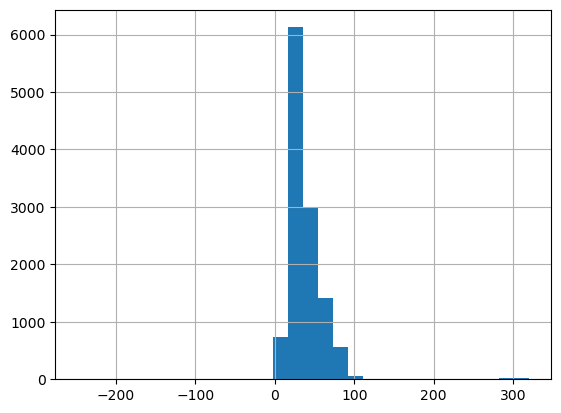

In [39]:
df.temperature.hist(bins=30)

In [41]:
df[df.temperature < 10]

,id,uniprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,PDB,pdb_mutant,method,effect,mutated_chain,DOI,source
241,242,P03034,Repressor protein cI,V36I,PDB,7.0,5.00,NaN,0.600000,cd,1lrp,None,gdnhcl,stabilizing,A,10.1021/bi00132a025,ThermoMutDB
250,251,P03034,Repressor protein cI,M40A,PDB,7.0,5.00,NaN,-2.100000,cd,1lrp,None,gdnhcl,destabilizing,A,10.1021/bi00132a025,ThermoMutDB
615,616,-,Nuclease-Concanavalin A hybrid protein,S28G,unsigned,7.0,0.00,NaN,-3.640000,cd,-,None,gdnscn,destabilizing,unsigned,10.1073/pnas.88.17.7715,ThermoMutDB
975,976,P02185,Myoglobin,A130L,PDB,7.5,0.00,NaN,-2.300000,cd,1bvc,None,urea,destabilizing,A,10.1021/bi00231a001,ThermoMutDB
976,977,P02185,Myoglobin,A130K,PDB,7.5,0.00,NaN,-3.700000,cd,1bvc,None,urea,destabilizing,A,10.1021/bi00231a001,ThermoMutDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,11816,O60260,E3 ubiquitin-protein ligase parkin,T55I,PDB and Uniprot,7.0,5.00,NaN,0.239234,cd,5tr5,None,urea,stabilizing,A,10.1074/jbc.RA117.000605,ThermoMutDB
11816,11817,O60260,E3 ubiquitin-protein ligase parkin,I44A,PDB and Uniprot,7.0,5.00,NaN,-1.148325,cd,5tr5,None,urea,destabilizing,A,10.1074/jbc.RA117.000605,ThermoMutDB
12013,12014,P0A6F5,60 kDa chaperonin,K4E,unsigned,7.5,-248.15,-4.5,-1.200000,fluorescence,1ss8,None,urea,destabilizing,A,10.1016/j.bbapap.2018.10.012,ThermoMutDB
12014,12015,P0A6F5,60 kDa chaperonin,D523K,unsigned,7.5,-248.15,-3.5,-1.100000,fluorescence,1ss8,None,urea,destabilizing,A,10.1016/j.bbapap.2018.10.012,ThermoMutDB


In [43]:
df[df.method == 'urea']

,id,uniprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,PDB,pdb_mutant,method,effect,mutated_chain,DOI,source
28,29,P0A7Y4,Ribonuclease HI,S68G,PDB and Uniprot,5.5,25.0,-8.0,-2.20,cd,2rn2,None,urea,destabilizing,A,10.1111/j.1432-1033.1992.tb16932.x,ThermoMutDB
29,30,P0A7Y4,Ribonuclease HI,S68A,PDB and Uniprot,5.5,25.0,-1.5,0.19,cd,2rn2,None,urea,destabilizing,A,10.1111/j.1432-1033.1992.tb16932.x,ThermoMutDB
30,31,P0A7Y4,Ribonuclease HI,S68T,PDB and Uniprot,5.5,25.0,-0.7,0.10,cd,2rn2,None,urea,destabilizing,A,10.1111/j.1432-1033.1992.tb16932.x,ThermoMutDB
31,32,P0A7Y4,Ribonuclease HI,S68V,PDB and Uniprot,5.5,25.0,1.9,1.29,cd,2rn2,None,urea,stabilizing,A,10.1111/j.1432-1033.1992.tb16932.x,ThermoMutDB
32,33,P0A7Y4,Ribonuclease HI,S68L,PDB and Uniprot,5.5,25.0,-1.6,-1.00,cd,2rn2,None,urea,destabilizing,A,10.1111/j.1432-1033.1992.tb16932.x,ThermoMutDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13252,13253,P07751,"Spectrin alpha chain, non-erythrocytic 1",Q1869G,unsigned,7.0,25.0,NaN,-1.30,fluorescence,1aj3,None,urea,destabilizing,A,10.1016/j.jmb.2004.09.023,ThermoMutDB
13323,13324,P42771,Cyclin-dependent kinase inhibitor 2A,"W15D,L37S,L121R",unsigned,8.5,20.0,NaN,-1.42,cd,1a5e,None,urea,destabilizing,unsigned,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13324,13325,P03050,Cyclin-dependent kinase inhibitor 2A,W15D,PDB and Uniprot,8.5,20.0,NaN,0.17,cd,1a5e,None,urea,stabilizing,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB
13325,13326,P03050,Cyclin-dependent kinase inhibitor 2A,L37S,PDB and Uniprot,8.5,20.0,NaN,0.71,cd,1a5e,None,urea,stabilizing,A,10.1016/s0022-2836(03)00043-3,ThermoMutDB


In [45]:
df[df.uniprot == "P42773"]

,id,uniprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,measure,PDB,pdb_mutant,method,effect,mutated_chain,DOI,source
6495,6496,P42773,Cyclin-dependent kinase inhibitor 2A,F71N,PDB and Uniprot,7.5,25.0,4.43,0.71,cd,1ihb,1MX2,urea,stabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6496,6497,P42773,Cyclin-dependent kinase inhibitor 2A,F92N,PDB and Uniprot,7.5,25.0,4.28,-1.08,cd,1ihb,1MX6,urea,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6497,6498,P42773,Cyclin-dependent kinase inhibitor 2A,F82Q,PDB and Uniprot,7.5,25.0,3.78,-0.46,cd,1ihb,1MX4,urea,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6498,6499,P42773,Cyclin-dependent kinase inhibitor 2A,F37H,PDB and Uniprot,7.5,25.0,0.75,-1.24,cd,1ihb,None,urea,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6499,6500,P42773,Cyclin-dependent kinase inhibitor 2A,R55V,PDB and Uniprot,7.5,25.0,0.62,-0.32,cd,1ihb,None,urea,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6500,6501,P42773,Cyclin-dependent kinase inhibitor 2A,W5R,PDB and Uniprot,7.5,25.0,-3.67,NaN,cd,1ihb,None,thermal,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6501,6502,P42773,Cyclin-dependent kinase inhibitor 2A,T85F,PDB and Uniprot,7.5,25.0,-7.60,NaN,cd,1ihb,None,thermal,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB
6502,6503,P42773,Cyclin-dependent kinase inhibitor 2A,H108L,PDB and Uniprot,7.5,25.0,-16.98,NaN,cd,1ihb,None,thermal,destabilizing,A,10.1074/jbc.M208061200,ThermoMutDB


<AxesSubplot: xlabel='dTm', ylabel='ddG'>

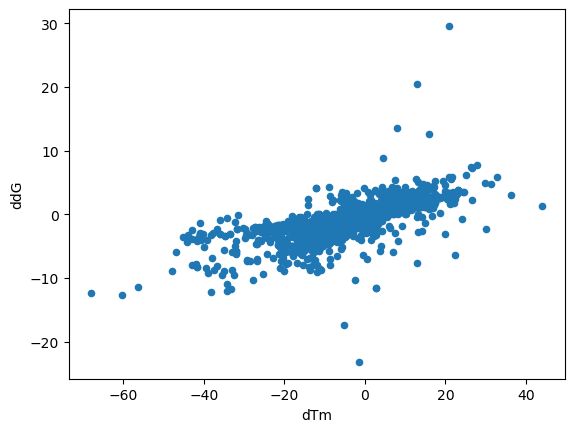

In [66]:
df.plot.scatter(x='dTm', y='ddG')

In [9]:
# copied from here: https://stackoverflow.com/a/29805905/7483950
def read_fasta(fp, gzipped=False):
        name, seq = None, []
        for line in fp:
            if gzipped:
                line = line.decode()
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line[1:], []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

In [44]:
prot_set = set(df.swissprot.dropna().unique()) | set(df.uniprot.dropna().unique())

In [45]:
len(prot_set)

511

In [46]:
fasta_file = "/projects/bpms/jlaw/inputs/uniprot/2023-01/uniprot_sprot_shortid.fasta.gz"
print(f"reading {fasta_file}")
seqs = {}
# prot_set = set(tms.keys())
with gzip.open(fasta_file, 'r') as f:
    for name, seq in read_fasta(f, gzipped=True):
        # just read in the proteins that have GO annotations
        if name not in prot_set:
            continue
        # make sure there aren't these strange AAs
        seq = seq.replace('B', 'D').replace('Z', 'E').replace('J', 'L')
        seqs[name] = seq

print(f"\t{len(seqs)} read")

reading /projects/bpms/jlaw/inputs/uniprot/2023-01/uniprot_sprot_shortid.fasta.gz
	450 read


In [14]:
def apply_mutations(seq, mutations, uniprot_id=None):
    mutations_list = []
    mut_seq = list(seq)
    for mut in mutations:
        if mut == '': continue
        try:
            pos = int(mut[1:-1])-1
            if uniprot_id in zero_based_index:
                pos += 1
        except ValueError:
            # print(row)
            # raise
            return "non-standard", np.nan, None
        wt_aa = mut[0]
        mut_aa = mut[-1]
        try:
            if wt_aa != seq[pos]:
                warning = f"WARNING: {wt_aa =} != {seq[pos]} for {uniprot_id} {pos}"
                return "mismatch", np.nan, warning
        except IndexError:
            warning = "WARNING: {pos =}, {len(seq) =} for {uniprot_id}"
            return "index_error", np.nan, warning
        mutations_list.append((wt_aa, pos, mut_aa))
        mut_seq[pos] = mut_aa
    return mutations_list, ''.join(mut_seq), None
        

def get_sequence(row):
    if row.swissprot not in seqs and row.uniprot not in seqs:
        return np.nan, np.nan, np.nan
    muts = row.mutation_code.split(',')
    # if the mutation matches the 'swissprot' column, use that
    seq = seqs.get(row.swissprot)
    if seq:
        mutations, mut_seq, warning = apply_mutations(seq, muts, row.swissprot)
        if not pd.isnull(mut_seq):
            return row.swissprot, mutations, mut_seq
        
    # otherwise, use the 'uniprot' column
    seq = seqs.get(row.uniprot)
    if seq and row.swissprot != row.uniprot:
        mutations, mut_seq, warning = apply_mutations(seq, muts, row.uniprot)
        if warning is not None:
            print(warning)
        return row.uniprot, mutations, mut_seq
    elif warning is not None:
        print(warning)
    return row.swissprot, mutations, mut_seq

In [39]:
len(df.dropna(subset='sequence'))

5479

In [40]:
len(df)

13337

In [16]:
zero_based_index = ["P62898", "P00004"]

In [145]:
df[df.swissprot == "P00509"]

,id,uniprot,swissprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,...,effect,exp_source,PDB,pdb_mutant,mutated_chain,DOI,source,uniprot_id,mutations,sequence
651,652,P00509,P00509,Aspartate aminotransferase,C191S,PDB,7.5,25.0,NaN,-1.80,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
652,653,P00509,P00509,Aspartate aminotransferase,C192A,PDB,7.5,25.0,NaN,-1.60,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
653,654,P00509,P00509,Aspartate aminotransferase,C270A,PDB,7.5,25.0,NaN,-2.50,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
654,655,P00509,P00509,Aspartate aminotransferase,C401A,PDB,7.5,25.0,NaN,3.20,...,stabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,index_error,NaN
655,656,P00509,P00509,Aspartate aminotransferase,"C82A,C191A,C192A,C270A,C401A",PDB,7.5,25.0,NaN,-1.00,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
656,657,P00509,P00509,Aspartate aminotransferase,C82A,PDB,7.5,25.0,NaN,-1.30,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
657,658,P00509,P00509,Aspartate aminotransferase,C191A,PDB,7.5,25.0,NaN,-2.20,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi00116a007,ThermoMutDB,P00509,mismatch,NaN
9213,9214,P00509,P00509,Aspartate aminotransferase,N294D,PDB,7.5,25.0,NaN,0.40,...,stabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi801431x,ThermoMutDB,P00509,mismatch,NaN
9214,9215,P00509,P00509,Aspartate aminotransferase,T10A,PDB,7.5,25.0,NaN,-1.30,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi801431x,ThermoMutDB,P00509,mismatch,NaN
9215,9216,P00509,P00509,Aspartate aminotransferase,E7A,PDB,7.5,25.0,NaN,-3.40,...,destabilizing,Escherichia coli (strain K12),1amq,None,A,10.1021/bi801431x,ThermoMutDB,P00509,mismatch,NaN


In [124]:
df[df.swissprot == "P00648"]

,id,uniprot,swissprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,...,effect,exp_source,PDB,pdb_mutant,mutated_chain,DOI,source,uniprot_id,mutations,sequence
98,99,P00648,P00648,Ribonuclease,T6P,PDB,6.3,25.0,NaN,-3.1900,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1016/0022-2836(92)90906-z,ThermoMutDB,P00648,mismatch,NaN
99,100,P00648,P00648,Ribonuclease,D8G,PDB,6.3,25.0,NaN,-1.2350,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1016/0022-2836(92)90906-z,ThermoMutDB,P00648,mismatch,NaN
100,101,P00648,P00648,Ribonuclease,D8S,PDB,6.3,25.0,NaN,-0.8350,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1016/0022-2836(92)90906-z,ThermoMutDB,P00648,mismatch,NaN
101,102,P00648,P00648,Ribonuclease,D12G,PDB,6.3,25.0,NaN,-0.9725,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1016/0022-2836(92)90906-z,ThermoMutDB,P00648,mismatch,NaN
102,103,P00648,P00648,Ribonuclease,D12S,PDB,6.3,25.0,NaN,-0.7750,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1016/0022-2836(92)90906-z,ThermoMutDB,P00648,mismatch,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,7043,P00648,P00648,Ribonuclease,Y13G,PDB,6.3,25.0,-15.6,-6.4000,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1021/bi0362267,ThermoMutDB,P00648,mismatch,NaN
7043,7044,P00648,P00648,Ribonuclease,Y97G,PDB,6.3,25.0,-17.9,-6.6000,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1021/bi0362267,ThermoMutDB,P00648,mismatch,NaN
7044,7045,P00648,P00648,Ribonuclease,Y17A,PDB,6.3,25.0,-5.1,-1.9000,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1021/bi0362267,ThermoMutDB,P00648,mismatch,NaN
7045,7046,P00648,P00648,Ribonuclease,Y13A,PDB,6.3,25.0,NaN,-3.7000,...,destabilizing,Bacillus amyloliquefaciens,1bni,None,A,10.1021/bi0362267,ThermoMutDB,P00648,mismatch,NaN


In [47]:
df[['uniprot_id', 'mutations', 'sequence']] = df.apply(
    get_sequence, axis=1, result_type='expand')

In [18]:
df.head(2)

,id,uniprot,swissprot,protein,mutation_code,mutation_based,ph,temperature,dTm,ddG,...,effect,exp_source,PDB,pdb_mutant,mutated_chain,DOI,source,uniprot_id,mutations,sequence
0,1,P0A878,P0A877,Tryptophan synthase alpha chain,E49M,PDB and Uniprot,7.0,25.8,NaN,4.6,...,stabilizing,Escherichia coli (strain K12),1wq5,None,A,10.1093/oxfordjournals.jbchem.a132423,ThermoMutDB,P0A877,"[(E, 48, M)]",MERYESLFAQLKERKEGAFVPFVTLGDPGIEQSLKIIDTLIEAGAD...
1,2,P0A878,P0A877,Tryptophan synthase alpha chain,E49Q,PDB and Uniprot,7.0,25.8,NaN,-2.5,...,destabilizing,Escherichia coli (strain K12),1wq5,None,A,10.1093/oxfordjournals.jbchem.a132423,ThermoMutDB,P0A877,"[(E, 48, Q)]",MERYESLFAQLKERKEGAFVPFVTLGDPGIEQSLKIIDTLIEAGAD...


In [28]:
# keep track of the pdb to swissprot mapping
# def pdb_and_chain_mapping(row):
    
df['pdb_and_chain'] = df['PDB'].str.upper() + df['mutated_chain']
df_mapping = df[['uniprot_id', 'PDB', 'pdb_and_chain']].drop_duplicates()

df_mapping.to_csv("/projects/robustmicrob/jlaw/inputs/thermomutdb/uniprot_pdb_mapping.csv")
df_mapping.head(2)

,uniprot_id,PDB,pdb_and_chain
0,P0A877,1wq5,1WQ5A
2,P00720,2lzm,2LZMA


In [32]:
# fix the chain on some entries
df.loc[df.PDB == "3dv0", 'mutated_chain'] = 'I'
df.loc[df.PDB == "3dv0", 'swissprot'] = 'P11961'

In [43]:
# fix the mapping of some entries
fix_mapping = {"2ptl": "Q53291",
               '1gua': 'P62834',
              }
for pdb_id, u_id in fix_mapping.items():
    df.loc[df.PDB == pdb_id, 'swissprot'] = u_id

In [48]:
df.set_index('id').to_csv("/projects/robustmicrob/jlaw/inputs/thermomutdb/20230201_thermomutdb_initial_parsing.csv")

### Original file from kaggle

I'm going to have to go through this to make sure I understand what this data is. Why do so many positions have XXX?

In [2]:
df = pd.read_csv("/projects/robustmicrob/jlaw/inputs/novozymes/NOVO_combined_dataset.csv")
df

,sequence,wildtype,pdb_position,seq_position,mutant,ddG,dT,wT,pH,source,PDB_chain
0,AAKDVKFGNDAGVKMLRGVNVLADAVKVTLGPKGRNVVLDKSFGAP...,D,473,471,C,0.000000,0.75,NaN,NaN,['ThermoMutDB'],1ss8A
1,AAKDVKFGNDAGVKMLRGVNVLADAVKVTLGPKGRNVVLDKSFGAP...,D,523,521,K,-1.100000,-3.75,NaN,NaN,['ThermoMutDB'],1ss8A
2,AAKDVKFGNDAGVKMLRGVNVLADAVKVTLGPKGRNVVLDKSFGAP...,K,4,2,E,-1.300000,-4.75,NaN,NaN,['ThermoMutDB'],1ss8A
3,AAQASVVANQLIPINTALTLVMMRSEVVTPVGIPAEDIPRLVSMQV...,D,36,36,A,0.705833,NaN,NaN,7.0,"['Q3421.txt', 'Q3214_direct.csv', 'Q1744_direc...",1msiA
4,AAQASVVANQLIPINTALTLVMMRSEVVTPVGIPAEDIPRLVSMQV...,D,58,58,N,-0.120000,NaN,NaN,7.0,"['Q3421.txt', 'Q3214_direct.csv', 'Q1744_direc...",1msiA
...,...,...,...,...,...,...,...,...,...,...,...
14651,YSIEADKKFKYSVKLSDYPTLQDAASAAVDGLLIDRDYNFYGGETV...,G,323,210,D,-0.130000,NaN,NaN,7.4,"['dataset_S2648.csv', 'iStable2.0 - s3568']",1tyvA
14652,YSIEADKKFKYSVKLSDYPTLQDAASAAVDGLLIDRDYNFYGGETV...,R,285,172,K,-3.430000,NaN,NaN,7.4,"['dataset_S2648.csv', 'iStable2.0 - s3568']",1tyvA
14653,YSIEADKKFKYSVKLSDYPTLQDAASAAVDGLLIDRDYNFYGGETV...,T,235,122,I,-0.530000,NaN,NaN,7.4,"['dataset_S2648.csv', 'iStable2.0 - s3568']",1tyvA
14654,YVDKGYEPSKKRDIIAVFRVTPAEGYTIEQAAGAVAAESSTGTWTT...,E,63,51,S,NaN,-7.20,NaN,NaN,['ThermoMutDB'],1gehA


In [24]:
df.sequence.values[11111][-1]

'E'

In [27]:
df[df.source == "['FireProtDB']"].sequence.values[0]

'ASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDKTHTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPGK'

In [25]:
df.sequence.values[0]

'AAKDVKFGNDAGVKMLRGVNVLADAVKVTLGPKGRNVVLDKSFGAPTITKDGVSVAREIELEDKFENMGAQMVKEVASKANDAAGDGTTTATVLAQAIITEGLKAVAAGMNPMDLKRGIDKAVTVAVEELKALSVPCSDSKAIAQVGTISANSDETVGKLIAEAMDKVGKEGVITVEDGTGLQDELDVVEGMQFDRGYLSPYFINKPETGAVELESPFILLADKKISNIREMLPVLEAVAKAGKPLLIIAEDVEGEALATLVVNTMRGIVKVAAVKAPGFGDRRKAMLQDIATLTGGTVISEEIGMELEKATLEDLGQAKRVVINKDTTTIIDGVGEEAAIQGRVAQIRQQIEEATSDYDREKLQERVAKLAGGVAVIKVGAATEVEMKEKKARVEDALHATRAAVEEGVVAGGGVALIRVASKLADLRGQNEDQNVGIKVALRAMEAPLRQIVLNCGEEPSVVANTVKGGDGNYGYNAATEEYGNMIDMGILDPTKVTRSALQYAASVAGLMITTECMVTDLPXXXXXXXXXXXXXXXXXX'

In [10]:
df.source.value_counts()

['FireProtDB']                                                                                                                                                                                                    4298
['ThermoMutDB']                                                                                                                                                                                                   3075
['dt-xgboost-5000-mutations-200-pdb-files-lb-0-40.csv', 'FireProtDB']                                                                                                                                             1469
['dataset_S2648.csv', 'iStable2.0 - s3568']                                                                                                                                                                        596
['pucci-proteins-appendixtable1.xlsx']                                                                                                      